## Pelatihan Dataset
**Import Library**

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

**Loading Dataset**

In [ ]:
df = pd.read_csv('theotown_reviews.csv')

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you like TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:10:22,1.12.50a
1,6e0a678d-51a1-430e-a204-a6aa13a1abd9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus gamenya bisa buat gedung DPR bagus banget ada sawit ada pom bensin itu dadah,3,0,NaN,2026-02-06 11:10:11,"Hi Ranjani! 😊 I'm glad you enjoy creating with TheoTown's features! If you have any suggestions or need help, feel free to reach out. We'd love to see your rating improve! 🌟 Happy building!\n\nChloe 🌸",2026-02-06 13:00:25,NaN
2,5c3e01e4-70f2-4c3b-8755-20214906ff42,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Collab sama game atau anime lain dong biar seru dan mohon kualitas grafiknya di tingkatkan lagi,5,0,NaN,2026-02-06 11:05:34,"Hi Londo! 😊 Thanks for your 5-star review! We're always exploring new ideas and collaborations to make TheoTown even more fun. Our charming pixel graphics are a key feature, but we're always looking to enhance the experience. Your support means a lot! 🌟 Ava",2026-02-06 12:20:27,NaN
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy TheoTown. Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏙️\n\nAva",2026-02-06 12:30:24,1.12.50a
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrilled to hear you enjoyed TheoTown. If you have any suggestions or need help, feel free to reach out. Happy building! 🏙️\n\nAva",2026-02-06 13:20:17,1.12.50a


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  11879 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          9035 non-null   object
 9   repliedAt             9035 non-null   object
 10  appVersion            11879 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [ ]:
# drop baris yang memiliki nilai nan dari dataset
clean_df = df.dropna()

In [ ]:
# drop baris duplikat dari clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_review_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7181 entries, 0 to 14994
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              7181 non-null   object
 1   userName              7181 non-null   object
 2   userImage             7181 non-null   object
 3   content               7181 non-null   object
 4   score                 7181 non-null   int64 
 5   thumbsUpCount         7181 non-null   int64 
 6   reviewCreatedVersion  7181 non-null   object
 7   at                    7181 non-null   object
 8   replyContent          7181 non-null   object
 9   repliedAt             7181 non-null   object
 10  appVersion            7181 non-null   object
dtypes: int64(2), object(9)
memory usage: 673.2+ KB


**Preprocessing**

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
import json

with open("slangwords.json", "r", encoding = 'utf-8') as file:
  slangwords = json.load(file)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you like TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:10:22,1.12.50a
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy TheoTown. Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏙️\n\nAva",2026-02-06 12:30:24,1.12.50a
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrilled to hear you enjoyed TheoTown. If you have any suggestions or need help, feel free to reach out. Happy building! 🏙️\n\nAva",2026-02-06 13:20:17,1.12.50a
6,73b5a2c2-45b0-40ad-b74a-3491cbf8725f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,gamenya bagus sih,5,0,1.12.50a,2026-02-06 10:52:31,"Hi Very Azis! 🌟 Thank you so much for your kind words. We're thrilled to hear you're enjoying TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏗️ Best, Chloe",2026-02-06 12:10:12,1.12.50a
8,2eac1e7b-8923-4198-9d11-3eda299506b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,seru banget asli,5,0,1.12.50a,2026-02-06 10:48:37,"Thank you so much, Faudzan! 😊 We're thrilled to hear you're enjoying TheoTown. Your support means the world to us. If you ever have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:20:20,1.12.50a
...,...,...,...,...,...,...,...,...,...,...,...
14980,2f7ba804-086e-4baf-bf1b-92120301e70d,Hamid,https://play-lh.googleusercontent.com/a-/ALV-UjXXG1PyQH9PKyagBXG6bChONmrpp6fC19r_dz91GSoRdvObjPM,geme nya bagus sekali,5,0,1.12.42a,2026-01-18 05:25:26,"Hi Hamid! 🌟 Thank you for your kind words! We're thrilled you enjoy TheoTown. If you have any suggestions or feedback, feel free to share. Your support means the world to us! Happy building! 🏙️ Best, Mia.",2026-01-18 05:50:18,1.12.42a
14982,97e2cbb1-5335-47a4-99b1-395c6ced2a76,taju taju,https://play-lh.googleusercontent.com/a/ACg8ocIJAz7DCiBzvbXHnJStY041fWCttdTyk2AgQz8acmE_dk6Beg=mo,sangat keren,5,0,1.12.42a,2026-01-18 05:24:15,"Thank you, Taju! 🌟 We're thrilled you find TheoTown very cool. Your support means the world to us. Keep building your dream city and enjoy the game! If you ever have feedback or questions, feel free to reach out. Happy city building! 🏙️ Best, Mia.",2026-01-18 05:30:14,1.12.42a
14984,9801dced-30e7-47a2-b042-945bf9e5f8ae,—LexxLuthor.,https://play-lh.googleusercontent.com/a/ACg8ocJHsPjPsPWItY8oTT4AU8Fag7yYnp4NlEmnFWjxLgtqqixZ1w=mo,SERU ABIEZ,5,0,1.12.42a,2026-01-18 05:23:59,"Hi Sjjsje! 🌟 We're thrilled to hear you're excited about TheoTown! Thank you for your amazing support. If you have any feedback or need help, feel free to reach out. Happy building! 🏙️ Best, Mia",2026-01-18 05:30:17,1.12.42a
14986,00087e9d-2d8d-4a56-9520-4d57d5aa4f4a,Narendra Azkarevy,https://play-lh.googleusercontent.com/a/ACg8ocJ5THNAlXdGdbDghQAXWhTBs6_WbjM6VwVs-sT0AX9V_hc6dw=mo,"Sangat bagus asik di mainan dan memberi kebebasan, saya sangat suka game ber

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you like TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:10:22,1.12.50a,i like,i like,i like,"[i, like]",[like],like
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy TheoTown. Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏙️\n\nAva",2026-02-06 12:30:24,1.12.50a,game ini sangat bagus,game ini sangat bagus,game ini sangat bagus,"[game, ini, sangat, bagus]","[game, bagus]",game bagus
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrilled to hear you enjoyed TheoTown. If you have any suggestions or need help, feel free to reach out. Happy building! 🏙️\n\nAva",2026-02-06 13:20:17,1.12.50a,bagus,bagus,bagus,[bagus],[bagus],bagus
6,73b5a2c2-45b0-40ad-b74a-3491cbf8725f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,gamenya bagus sih,5,0,1.12.50a,2026-02-06 10:52:31,"Hi Very Azis! 🌟 Thank you so much for your kind words. We're thrilled to hear you're enjoying TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏗️ Best, Chloe",2026-02-06 12:10:12,1.12.50a,gamenya bagus sih,gamenya bagus sih,gamenya bagus sih,"[gamenya, bagus, sih]","[gamenya, bagus]",gamenya bagus
8,2eac1e7b-8923-4198-9d11-3eda299506b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,seru banget asli,5,0,1.12.50a,2026-02-06 10:48:37,"Thank you so much, Faudzan! 😊 We're thrilled to hear you're enjoying TheoTown. Your support means the world to us. If you ever have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:20:20,1.12.50a,seru banget asli,seru banget asli,seru banget asli,"[seru, banget, asli]","[seru, banget, asli]",seru banget asli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980,2f7ba804-086e-4baf-bf1b-92120301e70d,Hamid,https://play-lh.googleusercontent.com/a-/ALV-UjXXG1PyQH9PKyagBXG6bChONmrpp6fC19r_dz91GSoRdvObjPM,geme nya bagus sekali,5,0,1.12.42a,2026-01-18 05:25:26,"Hi Hamid! 🌟 Thank you for your kind words! We're thrilled you enjoy TheoTown. If you have any suggestions or feedback, feel free to share. Your support means the world to us! Happy building! 🏙️ Best, Mia.",2026-01-18 05:50:18,1.12.42a,geme nya bagus sekali,geme nya bagus sekali,geme nya bagus sekali,"[geme, nya, bagus, sekali]","[geme, bagus]",geme bagus
14982,97e2cbb1-5335-47a4-99b1-395c6ced2a76,taju taju,https://play-lh.googleusercontent.com/a/ACg8ocIJAz7DCiBzvbXHnJStY041fWCttdTyk2AgQz8acmE_dk6Beg=mo,sangat keren,5,0,1.12.42a,2026-01-18 05:24:15,"Thank you, Taju! 🌟 We're thrilled you find TheoTown very cool. Your support means the world to us. Keep building your dream city and enjoy the game! If you ever have feedback or questions, feel free to reach out. Happy city building! 🏙️ Best, Mia.",2026-01-18 05:30:1

**label**

In [ ]:
# Labeling dengan lexicon
import csv
import requests
from io import StringIO

# Positive
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')


if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Negative
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
      polarity = 'neutral'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    2952
negative    2346
neutral     1883
Name: count, dtype: int64


**Visualisasi Data**

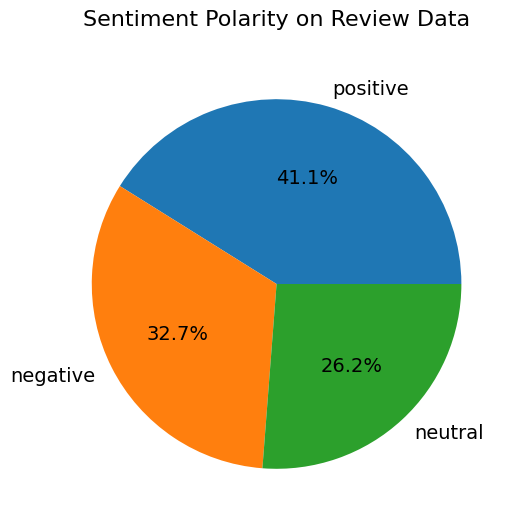

In [ ]:
# Pie Chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [ ]:
def word_reviews(df):
    pd.set_option('display.max_colwidth', 10000)
    reviews = {}

    for label in df['polarity'].unique():
        temp_df = df[df['polarity'] == label]
        temp_df = temp_df[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
        temp_df = temp_df.sort_values(by='polarity_score', ascending=False)
        temp_df = temp_df.reset_index(drop=True)
        temp_df.index += 1

        reviews[label] = temp_df

    return reviews

def make_wordcloud(df, title):
  list_words = ''
  for tweet in df['text_stopword']:
      for word in tweet:
          list_words += ' ' + (word)

  wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_title(title, fontsize=18)
  ax.grid(False)
  ax.imshow((wordcloud))
  fig.tight_layout(pad=0)
  ax.axis('off')
  plt.show()

In [ ]:
reviews = word_reviews(clean_df)
positive_reviews = reviews['positive']
negative_reviews = reviews['negative']
neutral_reviews = reviews['neutral']

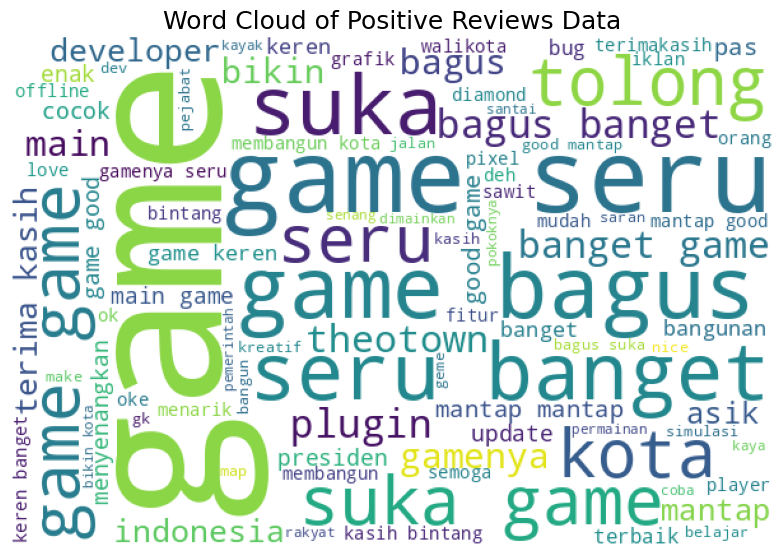

In [ ]:
make_wordcloud(positive_reviews, title="Word Cloud of Positive Reviews Data")


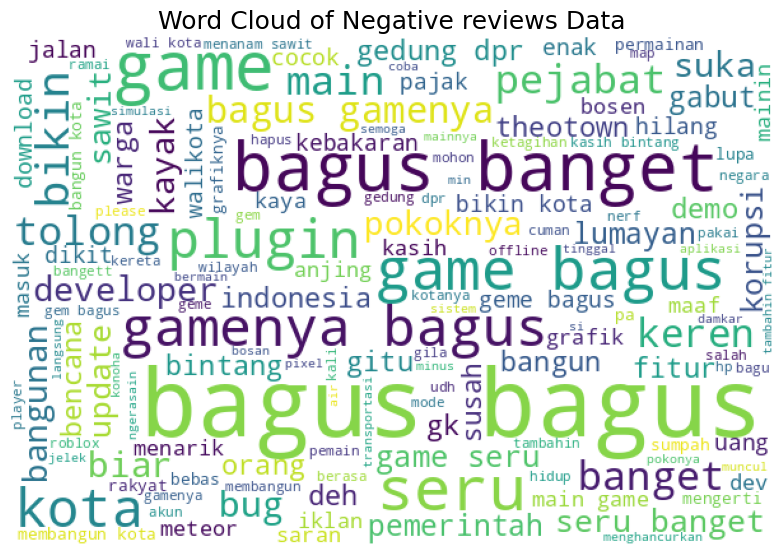

In [ ]:
make_wordcloud(negative_reviews, title="Word Cloud of Negative reviews Data")

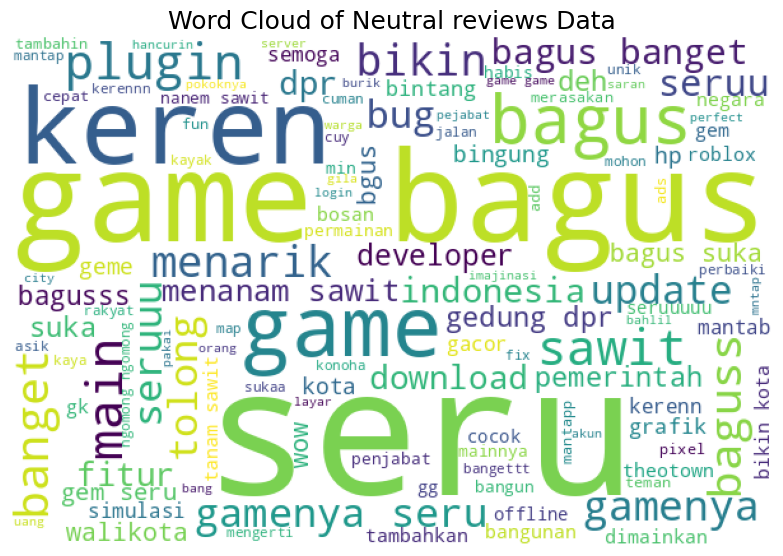

In [ ]:
make_wordcloud(neutral_reviews, title="Word Cloud of Neutral reviews Data")

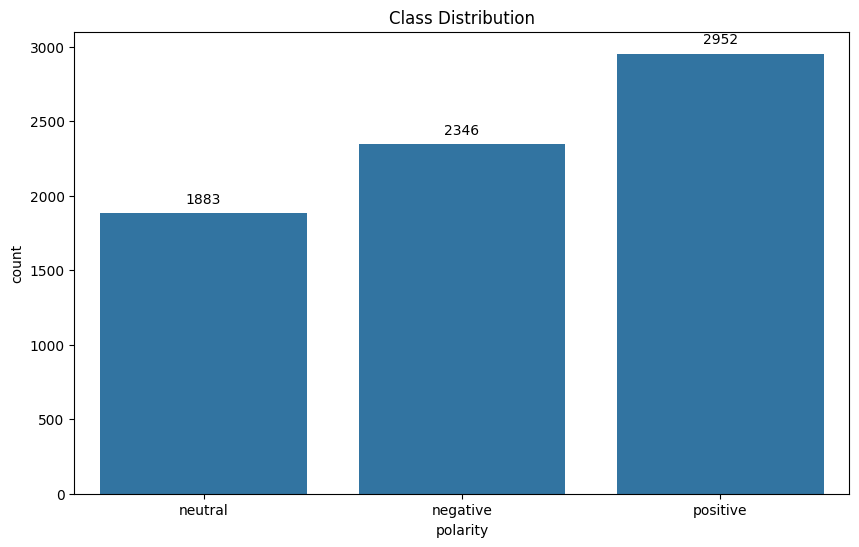

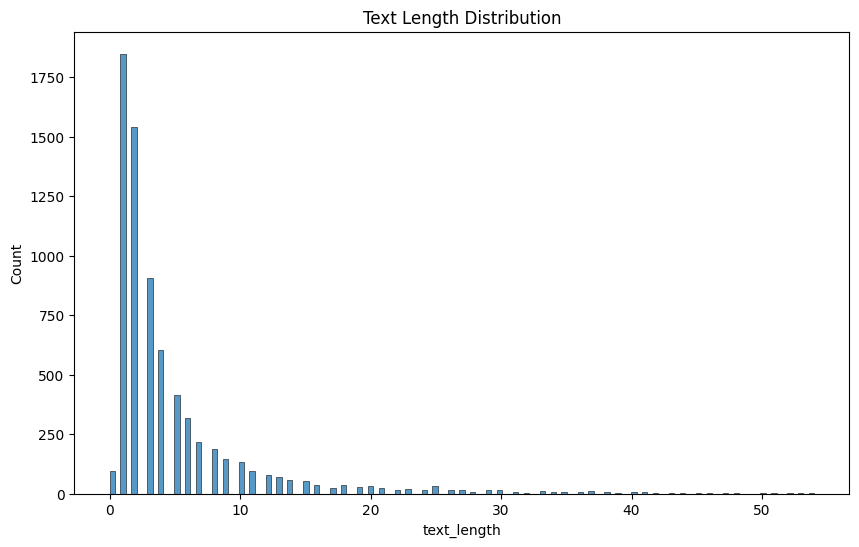

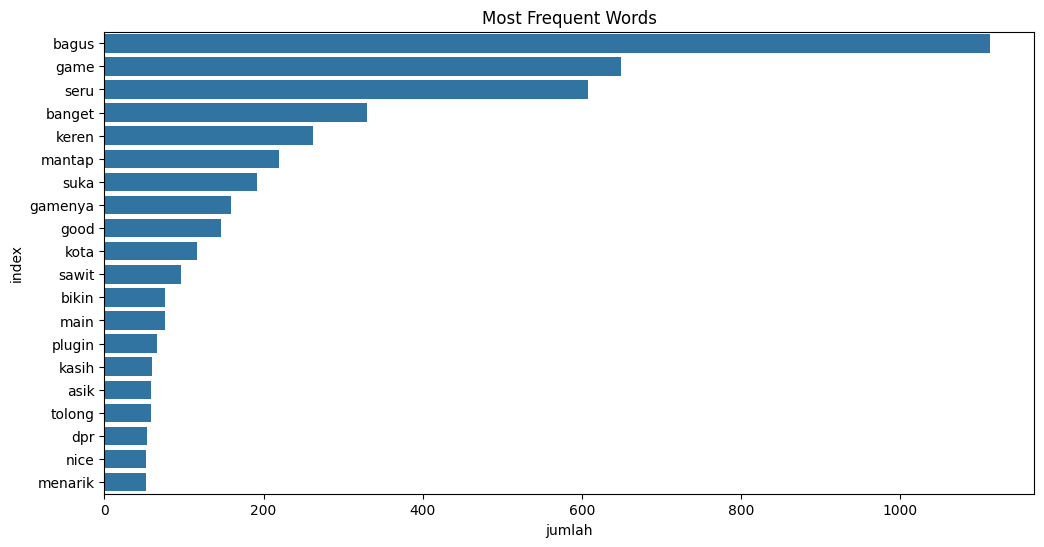

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

**Data Splitting**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you like TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:10:22,1.12.50a,i like,i like,i like,"[i, like]",[like],like,0,neutral,1
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy TheoTown. Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏙️\n\nAva",2026-02-06 12:30:24,1.12.50a,game ini sangat bagus,game ini sangat bagus,game ini sangat bagus,"[game, ini, sangat, bagus]","[game, bagus]",game bagus,0,neutral,2


In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

**TFID**

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
# Menampilkan hasil ekstraksi fitur
features_df

,add,air,akun,anak,anjing,asik,bagus,baguss,bagusss,bang,...,udh,update,versi,viral,wali,walikota,warga,wilayah,wow,yah
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.699539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.472180,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,0.0,0.0,0.0,0.0,0.0,0.000000,0.355354,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7177,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7178,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7179,0.0,0.0,0.0,0.0,0.0,0.334224,0.131300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Balancing Data menggunakan Teknik Oversampling SMOTE**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_tfidf, y)

In [ ]:
print(Counter(y_res))

Counter({'neutral': 2952, 'negative': 2952, 'positive': 2952})


**Random Forest dengan ekstrasi fitur TFID, 70/30**

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.964187772221326
Random Forest - accuracy_test: 0.8803161460293564


**BoW**

In [ ]:
# Ekstrasi Fitur Bag Of Word (BOW)
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Bag of Words
bow = CountVectorizer(
    max_features=2000,
    min_df=5,
    max_df=0.8
)

In [ ]:
X_bow = bow.fit_transform(X)

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_bow, y)

In [ ]:
print(Counter(y_res))

Counter({'neutral': 2952, 'negative': 2952, 'positive': 2952})


**Random Forest dengan ekstrasi fitur BoW, 80/20**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.20, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest bow - accuracy_train:', accuracy_train_rf_bow)
print('Random Forest bow - accuracy_test:', accuracy_test_rf_bow)

Random Forest bow - accuracy_train: 0.9789666854884246
Random Forest bow - accuracy_test: 0.8645598194130926


**Logistic Regression dengan ekstrasi fitur BoW, 75/25**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.921559771153267
Logistic Regression - accuracy_test: 0.8803071364046974


**Deep Learning LSTM 80/20**

In [ ]:
!pip install Tokenizer

In [ ]:
# Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(clean_df['text_akhir'])

sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


# Converting labels to numerical format
le = LabelEncoder()
y = le.fit_transform(clean_df['polarity'])
y = to_categorical(y, num_classes=3)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=200,
        input_length=MAX_SEQUENCE_LENGTH
    ),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas sentimen
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_int = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)

class_weight_dict = dict(enumerate(class_weights))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 96s 469ms/step - accuracy: 0.4871 - loss: 0.9396 - val_accuracy: 0.8573 - val_loss: 0.3820
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 387ms/step - accuracy: 0.9105 - loss: 0.2570 - val_accuracy: 0.8866 - val_loss: 0.3369
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 385ms/step - accuracy: 0.9569 - loss: 0.1273 - val_accuracy: 0.8866 - val_loss: 0.3641
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 69s 386ms/step - accuracy: 0.9732 - loss: 0.0831 - val_accuracy: 0.8935 - val_loss: 0.4398
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 377ms/step - accuracy: 0.9799 - loss: 0.0605 - val_accuracy: 0.8907 - val_loss: 0.4032


In [ ]:
# Evaluasiii
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, F1 score
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val_argmax = np.argmax(y_val, axis=1)

print('Precision:', precision_score(y_val_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_val_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_val_argmax, y_pred, average='weighted'))

# Evaluasi akurasi model LSTM pada data pelatihan
lstm_loss, lstm_accuracy_test = model.evaluate(X_val, y_val, verbose=0)

# Evaluasi akurasi model LSTM pada data
lstm_accuracy_train = history.history['accuracy'][-1]

# Menampilkan akurasi
print('LSTM - accuracy_train:', lstm_accuracy_train)
print('LSTM - accuracy_test:', lstm_accuracy_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step
Precision: 0.8905510162260883
Recall: 0.8865692414752957
F1 score: 0.8867787438557675
LSTM - accuracy_train: 0.9773676991462708
LSTM - accuracy_test: 0.8865692615509033


**Inferensi**

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Random Forest TFID 70/30', 'Random Forest BoW 80/20', 'Logistic Regression BoW 75/25', 'LSTM 80/20'],
    'Accuracy Train': [accuracy_train_rf, accuracy_train_rf_bow, accuracy_train_lr, lstm_accuracy_train],
    'Accuracy Test': [accuracy_test_rf, accuracy_test_rf_bow, accuracy_test_lr, lstm_accuracy_test]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                           Model  Accuracy Test
0       Random Forest TFID 70/30       0.880316
1        Random Forest BoW 80/20       0.864560
2  Logistic Regression BoW 75/25       0.880307
3                     LSTM 80/20       0.886569


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                           Model  Accuracy Test
3                     LSTM 80/20       0.886569
0       Random Forest TFID 70/30       0.880316
2  Logistic Regression BoW 75/25       0.880307
1        Random Forest BoW 80/20       0.864560


Dalam kasus Sentiment Analysis ini, algoritma LSTM mencapai akurasi tertinggi sebesar 93,22%. Oleh karena itu, algoritma LSTM dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [ ]:
kalimat_baru = [
    "Game ini seru banget dan bikin nagih",
    "Game-nya bikin pusing",
    "Grafiknya biasa aja"
]

In [ ]:
def inferensi(kalimat):
  if isinstance(kalimat, str):
        kalimat = [kalimat]

  sequences = tokenizer.texts_to_sequences(kalimat)
  padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

  pred = model.predict(padded)
  pred_class = np.argmax(pred, axis=1)

  pred_label = le.inverse_transform(pred_class)

  for text, label in zip(kalimat, pred_label):
      print(f"Teks: {text}")
      print(f"Prediksi Sentimen: {label}")
      print("-" * 40)

In [ ]:
inferensi(kalimat_baru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Teks: Game ini seru banget dan bikin nagih
Prediksi Sentimen: positive
----------------------------------------
Teks: Game-nya bikin pusing
Prediksi Sentimen: neutral
----------------------------------------
Teks: Grafiknya biasa aja
Prediksi Sentimen: neutral
----------------------------------------


In [ ]:
inferensi("Game-nya jelek")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Teks: Game-nya jelek
Prediksi Sentimen: neutral
----------------------------------------
